   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L   ...     \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91   ...      
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76   ...      
2    1963   AL    LAA       ANA  None     9  161   81.0  70  91   ...      
3    1964   AL    LAA       ANA  None     5  162   81.0  82  80   ...      
4    1965   AL    CAL       ANA  None     7  162   80.0  75  87   ...      

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro  franchID  \
0     603510  111  112      LAA             LAA          LAA       ANA   
1    1144063   97   97      LAA             LAA          LAA       ANA   
2     821015   94   94      LAA             LAA          LAA       ANA   
3     760439   90   90      LAA             LAA          LAA       ANA   
4     566727   97   98      CAL             CAL          CAL       ANA   

                      franchName  active  NAassoc  
0  Los Angeles Angels of Anaheim       Y     N

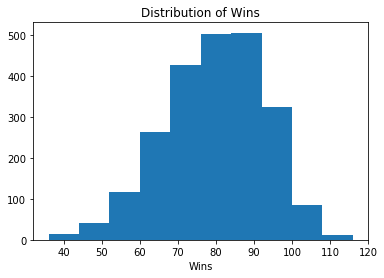

mean of Wins:  79.23043288150416



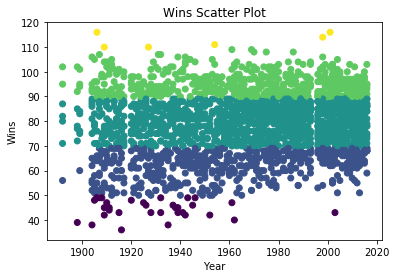

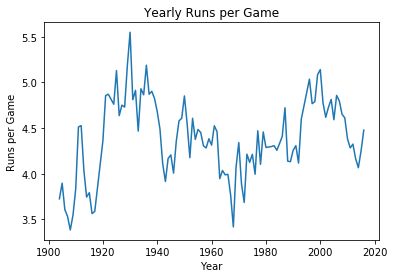

  teamID    G   W    R    AB     H   2B  3B   HR   BB     ...       \
0    LAA  162  70  744  5424  1331  218  22  189  681     ...        
1    LAA  162  86  718  5499  1377  232  35  137  602     ...        
2    LAA  161  70  597  5506  1378  208  38   95  448     ...        
3    LAA  162  82  544  5362  1297  186  27  102  472     ...        
4    CAL  162  75  527  5354  1279  200  36   92  443     ...        

   decade_1920  decade_1930  decade_1940  decade_1950  decade_1960  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0            0            0            0            1   
3            0            0            0            0            1   
4            0            0            0            0            1   

   decade_1970  decade_1980  decade_1990  decade_2000  decade_2010  
0            0            0            0            0            0  
1            0      

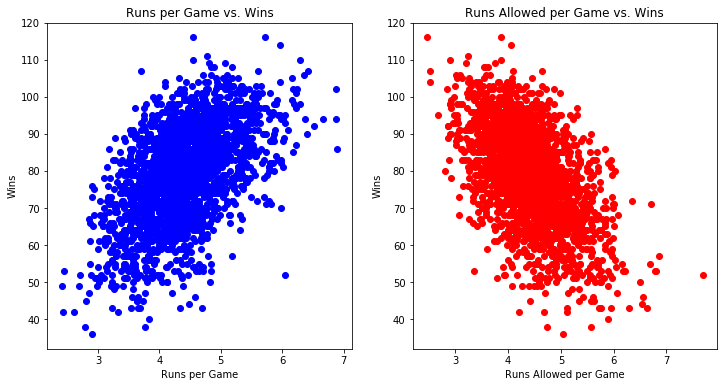

correlation of all the columns and column 'Wins'
G              0.178958
W              1.000000
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
era_1         -0.077104
era_2         -0.083089
era_3         -0.033073
era_4         -0.052278
era_5          0.042122
era_6          0.058439
era_7          0.066049
era_8          0.043453
decade_1910   -0.077104
decade_1920   -0.055176
decade_1930   -0.052358
decade_1940   -0.050249
decade_1950   -0.047499
decade_1960    

In [46]:
import pandas as pd
import sqlite3

# initialize connection
conn = sqlite3.connect('data/lahman2016.sqlite')

# initialize query
query = '''select * from Teams
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

# execute query
teams = conn.execute(query).fetchall()

# convert query results into dataframe
teams_df = pd.DataFrame(teams)

# set column names
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

# print the first rows
print(teams_df.head())
print("")

# print the number of rows
print(len(teams_df))
print("")

# drop unnecessary columns
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
df = teams_df.drop(drop_cols, axis=1)

# print the first rows
print(df.head())
print("")

# count the numbers of nulls of all columns
print(df.isnull().sum(axis=0).tolist())
print("")

# print colummn names and the numbers of nulls of columns with any nulls
num_of_null_by_col = df.isnull().sum(axis=0).tolist()
print("column", "\t", "number of nulls")
for i in range(len(num_of_null_by_col)):
    if(num_of_null_by_col[i] != 0):
        print(list(df.columns)[i], "\t", num_of_null_by_col[i])
print("")

# drop columns (CS and HBP)
df = df.drop(['CS','HBP'], axis=1)

# fill nulls with meadian values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

# count the numbers of nulls of all columns
print(df.isnull().sum(axis=0).tolist())
print("")


###############################################

# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline  
%matplotlib inline

# plot distribution of W
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()


# calculate mean of W
print("mean of Wins: ", df['W'].mean())
print("")

# create bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5

# apply `assign_win_bins` to column W
df['win_bins'] = df['W'].apply(assign_win_bins)


# plot scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

# filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

# create runs per year dictionary
# create games per year dictionary
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
#print(runs_per_year)
#print(games_per_year)

# create runs per game (per year) dictionary
mlb_runs_per_game = {}
for year, games in games_per_year.items():
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
#print(mlb_runs_per_game)

# create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())

# create line plot of 'Year' vs. 'Runs per Game'
x, y = zip(*lists)
plt.plot(x, y)
plt.title('Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('Runs per Game')

plt.show()


########################################

# create 'year_label' column, which will give your algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)
def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# add 'year_label' column   
df['year_label'] = df['yearID'].apply(assign_label)
dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# concatenate 'df' and 'dummy_df'
df = pd.concat([df, dummy_df], axis=1)

#print(df.head())


# convert years into decade bins and create dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

# drop columns yearID, year_label, decade_label
df = df.drop(['yearID','year_label','decade_label'], axis=1)

print(df.head())
print("")

# add columns 'Runs per Game' and 'Runs Allowed per Game'
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']


# create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_ylabel('Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

# calculate correlation of all the columns and column 'Wins'
corr = df.corr()['W']
print("correlation of all the columns and column 'Wins'")
print(corr)
print("")


attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG', 'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game']
data_attributes = df[attributes]

# print the first rows of `df`
print(df.head())